In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, InputLayer, Softmax, Flatten, Input
import matplotlib.pyplot as plt
import cv2

In [7]:
data_dir = 'C:\\Users\\zaidr\\$ML_PATH\\Animal Classification\\Data'
batch_size= 32

In [8]:
height, width = 227, 227

In [82]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.05,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=batch_size)

Found 4000 files belonging to 4 classes.
Using 3800 files for training.


In [85]:
val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.05,
        subset="validation",
        seed=123,
        image_size=(height, width),
        batch_size=batch_size)

Found 4000 files belonging to 4 classes.
Using 200 files for validation.


In [105]:
train_ds.class_names

['Buffalo', 'Elephant', 'Rhino', 'Zebra']

In [11]:
NUM_Classes = 4

In [12]:
input_shape = (227, 227)

### My model has two main difference between it and the original Alexnet which is Batch Normalization the original architecture has used local response normalizatin but I has noticed that BN is better on this specific data set. Also, I have used BN on all conv layers, the original one has used LRN on specific layers.

In [13]:
model = tf.keras.Sequential()
model.add(Conv2D(96,(11, 11),strides=4, activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D((3, 3), strides=2))
model.add(Conv2D(256,(5, 5), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2))
model.add(Conv2D(384,(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(256,(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Dense(4, activation='softmax'))

In [91]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(factor=1e-2,verbose=True)

In [95]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    metrics=['accuracy']    
)

C:\Users\zaidr\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [97]:
model.fit(train_ds, validation_data=val_ds, batch_size=batch_size, epochs=10, callbacks=lr_schedule)

Epoch 1/10
119/119 [==============================] - 41s 341ms/step - loss: 1.2028 - accuracy: 0.4703 - val_loss: 1.8546 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/10
119/119 [==============================] - 40s 335ms/step - loss: 1.1556 - accuracy: 0.4511 - val_loss: 587.4108 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 3/10
119/119 [==============================] - 40s 332ms/step - loss: 1.1762 - accuracy: 0.4624 - val_loss: 363.1932 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/10
119/119 [==============================] - 40s 334ms/step - loss: 1.1182 - accuracy: 0.4534 - val_loss: 6.0235 - val_accuracy: 0.3650 - lr: 0.0010
Epoch 5/10
119/119 [==============================] - 40s 333ms/step - loss: 1.2229 - accuracy: 0.4518 - val_loss: 16.6129 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 6/10
119/119 [==============================] - 40s 332ms/step - loss: 1.1334 - accuracy: 0.4429 - val_loss: 1.8656 - val_accuracy: 0.2550 - lr: 0.0010
Epoch 7/10
119/119 [===========================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(227, 227, 3)


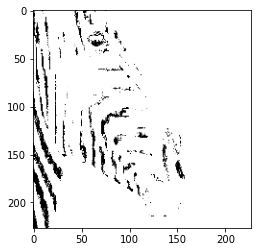

In [99]:
for img, label in train_ds.take(1):
    print(img.numpy()[0].shape)
    plt.imshow(img.numpy()[27])
    break

In [100]:
np.around(model.predict(train_ds.take(1)), decimals=3)*100

1/1 [==============================] - 0s 383ms/step


array([[  0.       ,   0.       ,   0.       , 100.       ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 20.6      ,  32.4      ,  28.099998 ,  18.9      ],
       [  0.       ,   0.       ,   0.       , 100.       ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [  0.       ,   0.       ,   0.       , 100.       ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35.7      ,  35.5      ,   2.2      ],
       [ 26.6      ,  35

In [101]:
y_hat = np.apply_along_axis(np.argmax, 1, np.around(model.predict(train_ds.take(1)), decimals=3)*100)

1/1 [==============================] - 0s 212ms/step


In [102]:
for i, labels in train_ds.take(1):
    y = labels
    break

In [103]:
y

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 2, 3, 3, 2, 2, 1, 0, 2, 3, 3, 3, 2, 1, 3, 3, 2, 1, 2, 0, 2,
       1, 3, 3, 2, 0, 1, 2, 0, 0, 3])>

In [104]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 3], dtype=int64)

## It is clearly underfitting the data and that is because lacking of data.
### What we can do next?
#### 1. Grab dats
#### 2. Augment the data
#### 3. Get pretrained weights then fine tune them.
#### 4. Train longer